# Coursera - Statistical Inference Project 

#### By Mandy Jiang  (03/02/2022) 

## Part II. Basic inferential data analysis

We're going to analyze the ToothGrowth data in the R datasets package.

(1) Load the ToothGrowth data and perform some basic exploratory data analyses. \
(2) Provide a basic summary of the data. \
(3) Use confidence intervals and/or hypothesis tests to compare tooth growth by supp and dose. (Only use the techniques from class, even if there's other approaches worth considering) \
(4) State your conclusions and the assumptions needed for your conclusions.

### Summary and exploratory data analyses

In [32]:
ToothGrowth %>%
  group_by(supp, dose) %>%
  summarise(mean = mean(len), median = median(len), min = min(len), max = max(len), sd=sd(len), n = n())

supp,dose,mean,median,min,max,sd,n
OJ,0.5,13.23,12.25,8.2,21.5,4.459709,10
OJ,1.0,22.70,23.45,14.5,27.3,3.910953,10
OJ,2.0,26.06,25.95,22.4,30.9,2.655058,10
VC,0.5,7.98,7.15,4.2,11.5,2.746634,10
VC,1.0,16.77,16.50,13.6,22.5,2.515309,10
VC,2.0,26.14,25.95,18.5,33.9,4.797731,10


This dataset contains 2 supp methods, OJ and VC, and each methods have 3 dose groups, 0.5, 1 and 2. By observing mean and median, length in dose of 1 and 2 is almost 2-fold to the one in dose of 0.5. Also, the length difference is more obvious in VC than OJ when comparing dose of 1 and 2.

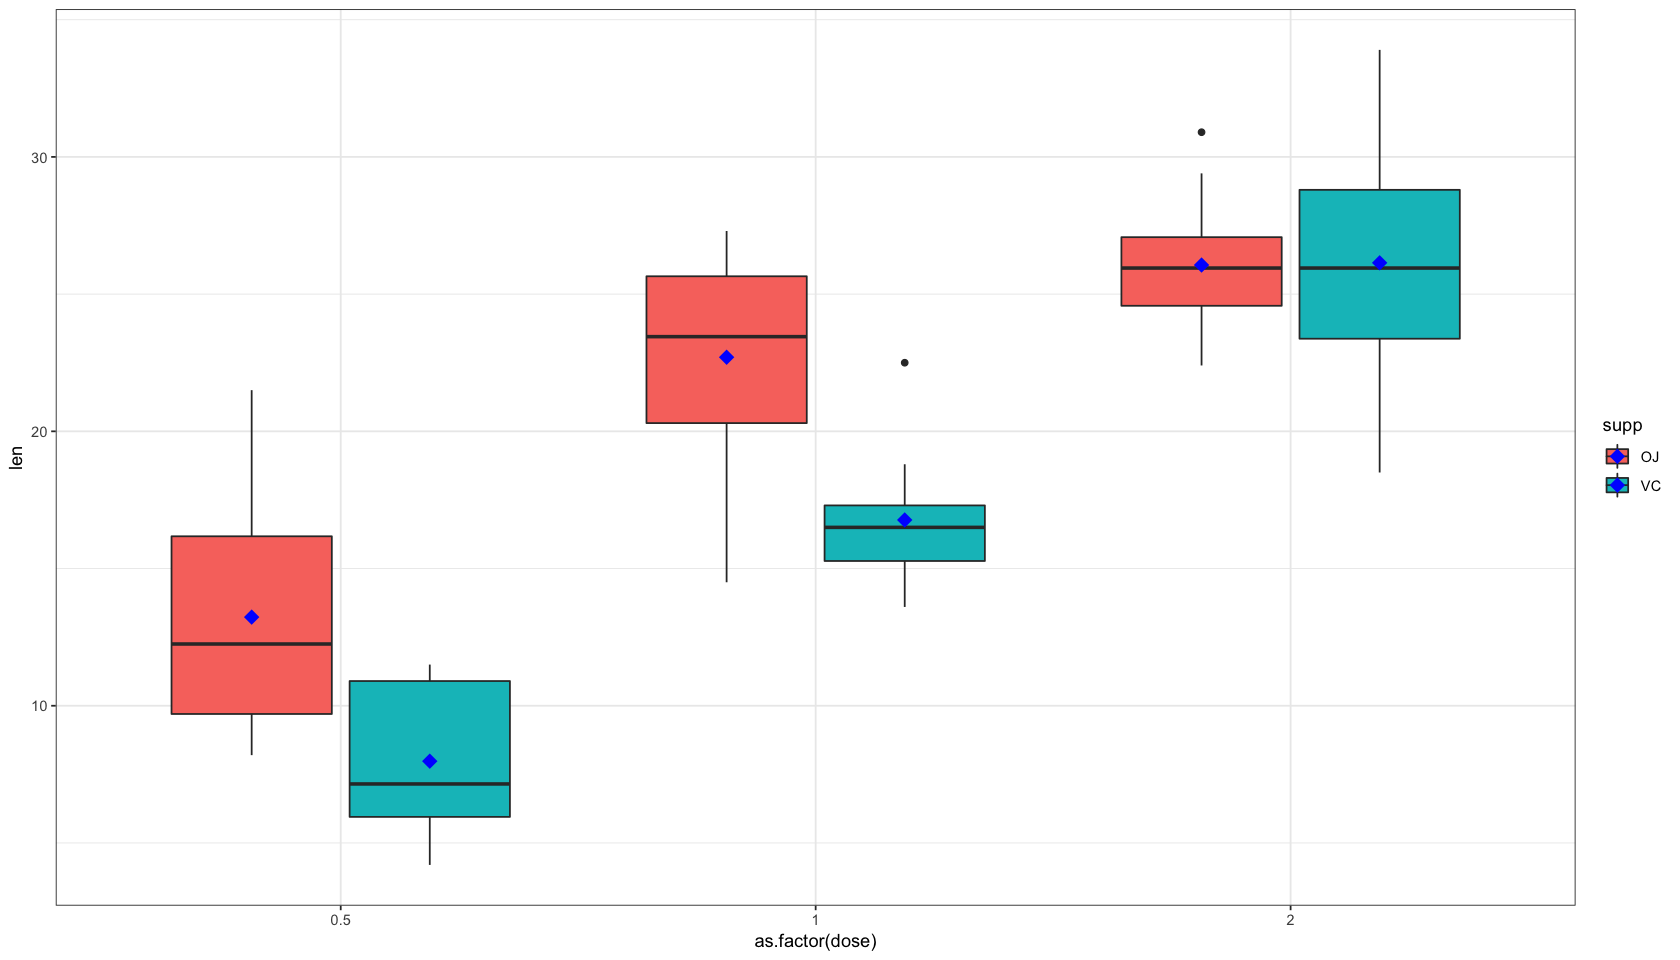

In [65]:
library(ggplot2)
p = ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill=supp)) +
  geom_boxplot()+
  stat_summary(fun.y=mean, geom="point", shape=18, size=4, color="blue",position=position_dodge(0.75))+
  theme_bw()
options(p.plot.width = 0.5, p.plot.height = 0.5)
p

The boxplot shows that higher dose is associated with longer len in both OJ and VC mode. In addition, OJ is associated with longer length than VC in 0.5 and 1 dose but not in 2.

### Hypothesis tests

(1) First, we are going to test whether supp methods have impacts on len. Null hypothesis: \
H0: supp has no impacts on len. \
We are going to use unpaired t-test to validate the hypothesis.

In [1]:
t.test(ToothGrowth$len[ToothGrowth$supp == "VC"],ToothGrowth$len[ToothGrowth$supp == "OJ"], paired=FALSE)


	Welch Two Sample t-test

data:  ToothGrowth$len[ToothGrowth$supp == "VC"] and ToothGrowth$len[ToothGrowth$supp == "OJ"]
t = -1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.5710156  0.1710156
sample estimates:
mean of x mean of y 
 16.96333  20.66333 


Given that p-value = 0.06063 > 0.05, the t statistic falls on the left side of reject region; therefore
we cannot reject null hypothesis. In addition, the 95% confident interval contains mean difference = 0, indicating no
significant difference between these two supp modes.

(2) Second, we are going to test whether dose have impacts on len. Null hypothesis: \
H0: dose has no impacts on len. \
We are going to use unpaired t-test to validate the hypothesis.

In [8]:
t.test(ToothGrowth$len[ToothGrowth$dose == 0.5],ToothGrowth$len[ToothGrowth$dose == 1], paired=FALSE)$p.value
t.test(ToothGrowth$len[ToothGrowth$dose == 0.5],ToothGrowth$len[ToothGrowth$dose == 2], paired=FALSE)$p.value
t.test(ToothGrowth$len[ToothGrowth$dose == 1],ToothGrowth$len[ToothGrowth$dose == 2], paired=FALSE)$p.value

[1] 1.268301e-07

[1] 4.397525e-14

[1] 1.90643e-05

Given that p-value < 0.05 across three doese comparison, the t statistic falls on the right side of reject region;
therefore we can reject the null hypothesis.

(3) Third, we are going to test whether supp methods have impacts on len within each dose. \
H0: supp has no impacts on len given dose to 0.5, 1, and 2. \
H1: OJ causes longer len than VJ given dose to 0.5, 1 and 2. \
We are going to use unpaired t-test to validate the hypothesis.

In [10]:
dose_0.5 = ToothGrowth[ToothGrowth$dose == 0.5,]
dose_1.0 = ToothGrowth[ToothGrowth$dose == 1,]
dose_2.0 = ToothGrowth[ToothGrowth$dose == 2,]

In [25]:
t.test(dose_0.5$len[dose_0.5$supp == 'OJ'],dose_0.5$len[dose_0.5$supp == 'VC'],
       paired=FALSE,alternative='greater')$p.value
t.test(dose_0.5$len[dose_0.5$supp == 'OJ'],dose_0.5$len[dose_0.5$supp == 'VC'],
       paired=FALSE,alternative='greater')$conf.int

[1] 0.003179303

[1] 2.34604     Inf
attr(,"conf.level")
[1] 0.95

Given dose to 0.5, the probability of OJ is greater than VC is about 0.00317 (p-value < 0.05), and therefore we can 
reject the null hypothesis and state that OJ causes longer len than VJ under the dose of 0.5.

In [26]:
t.test(dose_1.0$len[dose_1.0$supp == 'OJ'],dose_1.0$len[dose_1.0$supp == 'VC'],
       paired=FALSE,alternative='greater')$p.value
t.test(dose_1.0$len[dose_1.0$supp == 'OJ'],dose_1.0$len[dose_1.0$supp == 'VC'],
       paired=FALSE,alternative='greater')$conf.int

[1] 0.0005191879

[1] 3.356158      Inf
attr(,"conf.level")
[1] 0.95

Given dose to 1, the probability of OJ is greater than VC is about 0.00052 (p-value < 0.05), and therefore we can reject the null hypothesis and state that OJ causes longer len than VJ under the dose of 1.

In [29]:
t.test(dose_2.0$len[dose_2.0$supp == 'OJ'],dose_2.0$len[dose_2.0$supp == 'VC'],
       paired=FALSE,alternative='greater')$p.value
t.test(dose_2.0$len[dose_2.0$supp == 'OJ'],dose_2.0$len[dose_2.0$supp == 'VC'],
       paired=FALSE,alternative='greater')$conf.int
t.test(dose_2.0$len[dose_2.0$supp == 'OJ'],dose_2.0$len[dose_2.0$supp == 'VC'],
       paired=FALSE,alternative='two.sided')$p.value

[1] 0.5180742

[1] -3.1335     Inf
attr(,"conf.level")
[1] 0.95

[1] 0.9638516

Given dose to 2, the probability of OJ is greater than VC is about 0.51807 (p-value > 0.05), and therefore we cannot reject the null hypothesis. In addition, p-value is 0.96385 > 0.05 in two-sided test, indicating that supp mothods have no impacts on len under the dose of 2.

### Conclusions

(1) The does has significant influence on the teeth growth; higher dose is associated with longer length. \
(2) The supp methods has significant influence on the teeth growth if the dose is 0.5 and 1; however, supp has no impacts
on teeth growth if the dose is 2. \
(3) If supp methods can impact teeth growth, OJ is associated with longer length than VJ mode. 